In [1]:
from time import time
import unittest
import numpy as np
from sklearn.metrics import silhouette_score

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 

from keras.datasets import mnist
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import VAE, ConvVAE

Using TensorFlow backend.


importing Jupyter notebook from ../module/autoencoder.ipynb


In [2]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
numClass = 10
sizeDigit = xTrain.shape[1:]

dimInput = [*xTrain.shape[1:], 1]
xTrain = xTrain.reshape((numTrain, *dimInput))
xTest = xTest.reshape((numTest, *dimInput))
print(xTrain.shape)
print(xTest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Default parameters

In [12]:
modelPath = '../model/temp/'
convVAE = ConvVAE(dimInput)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 312us/step - loss: 0.2310 - val_loss: 0.2100

Epoch 00001: val_loss improved from inf to 0.21003, saving model to ../model/temp/AutoEncoder.01-0.23-0.21.hdf5
Epoch 2/50
60000/60000 [==============================] - 17s 289us/step - loss: 0.2073 - val_loss: 0.2043

Epoch 00002: val_loss improved from 0.21003 to 0.20432, saving model to ../model/temp/AutoEncoder.02-0.21-0.20.hdf5
Epoch 3/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.2033 - val_loss: 0.2020

Epoch 00003: val_loss improved from 0.20432 to 0.20203, saving model to ../model/temp/AutoEncoder.03-0.20-0.20.hdf5
Epoch 4/50
60000/60000 [==============================] - 17s 282us/step - loss: 0.2011 - val_loss: 0.2005

Epoch 00004: val_loss improved from 0.20203 to 0.20046, saving model to ../model/temp/AutoEncoder.04-0.20-0.20.hdf5
Epoch 5/50
60000/60000 [==============================] - 

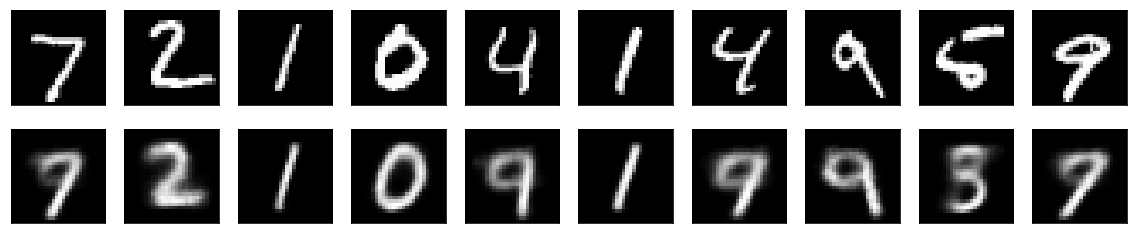

0.20064777


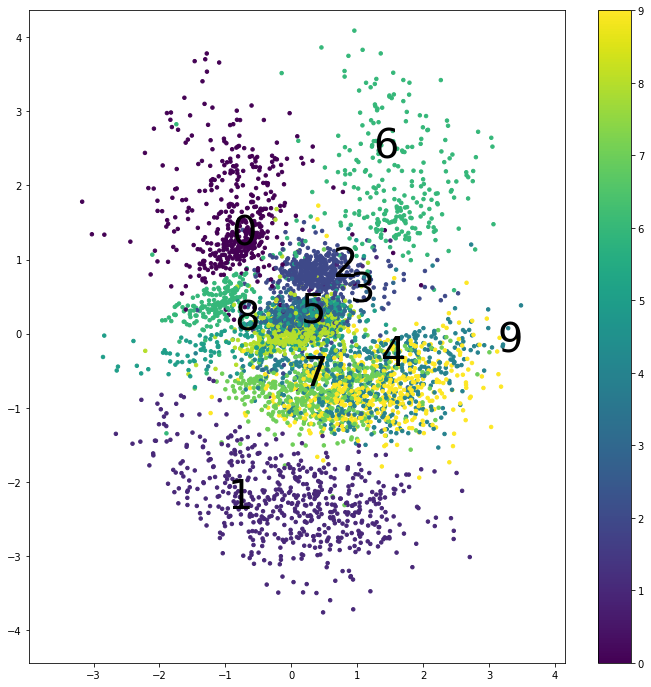

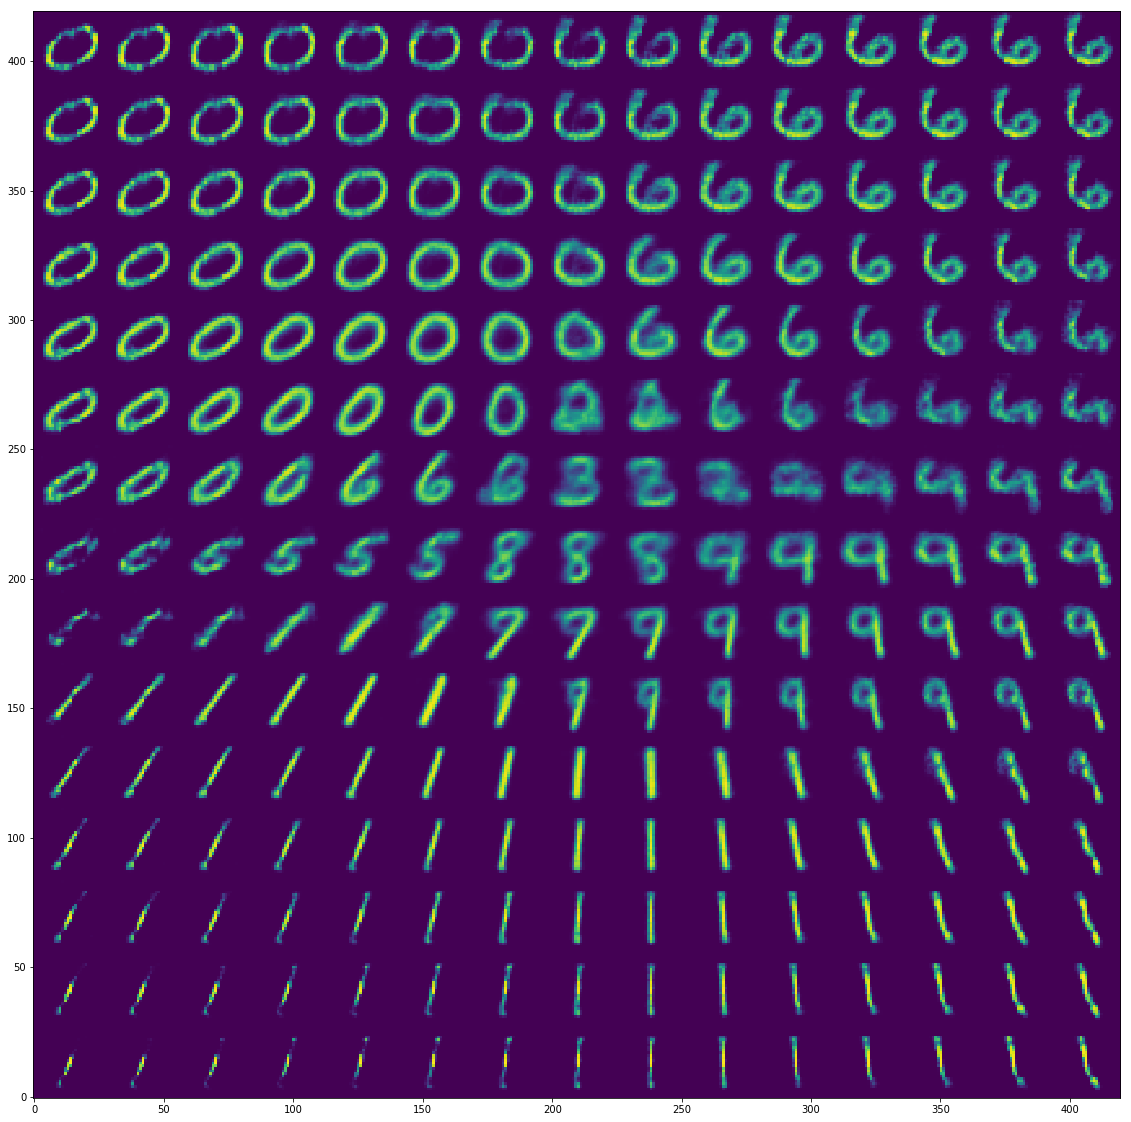

In [16]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=5000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Another parameter setting

In [5]:
numEpochs = 100
sizeBatch = 32
sizeKernel = 3
ratRecon = 1
nameOptim = 'adam'
modelPath = '../model/temp/'
patience = 3


convVAE = ConvVAE(dimInput, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 282us/step - loss: 0.2274 - val_loss: 0.2015

Epoch 00001: val_loss improved from inf to 0.20148, saving model to ../model/temp/AutoEncoder.01-0.23-0.20.hdf5
Epoch 2/100
60000/60000 [==============================] - 16s 264us/step - loss: 0.1977 - val_loss: 0.1925

Epoch 00002: val_loss improved from 0.20148 to 0.19250, saving model to ../model/temp/AutoEncoder.02-0.20-0.19.hdf5
Epoch 3/100
60000/60000 [==============================] - 16s 270us/step - loss: 0.1919 - val_loss: 0.1896

Epoch 00003: val_loss improved from 0.19250 to 0.18960, saving model to ../model/temp/AutoEncoder.03-0.19-0.19.hdf5
Epoch 4/100
60000/60000 [==============================] - 16s 269us/step - loss: 0.1892 - val_loss: 0.1884

Epoch 00004: val_loss improved from 0.18960 to 0.18838, saving model to ../model/temp/AutoEncoder.04-0.19-0.19.hdf5
Epoch 5/100
60000/60000 [=============================

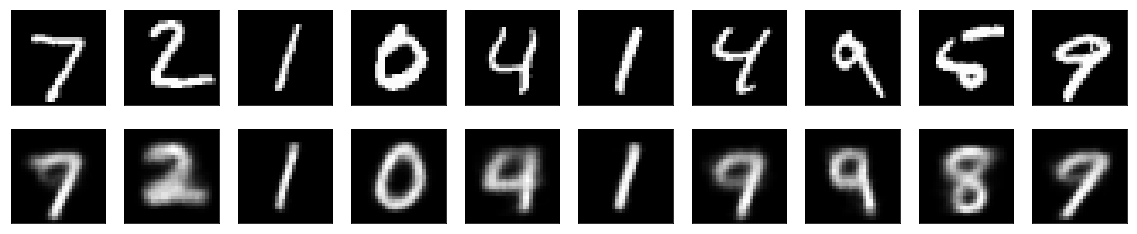

0.20016138


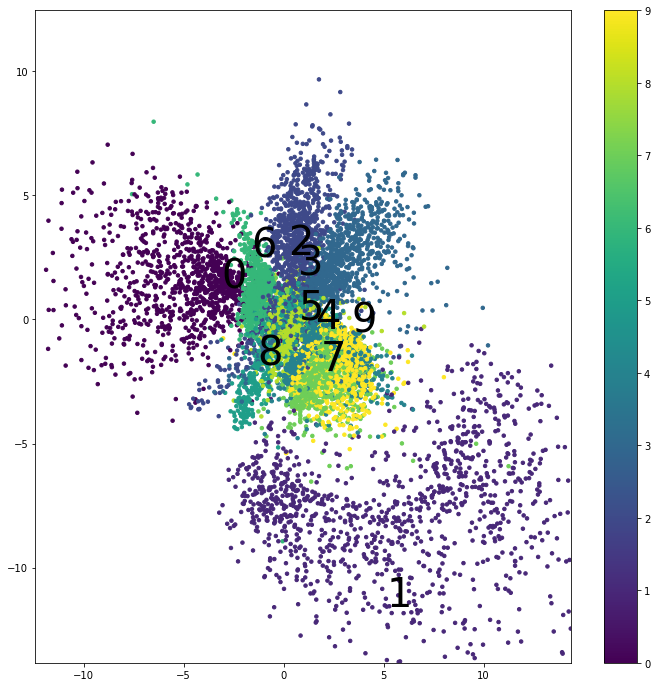

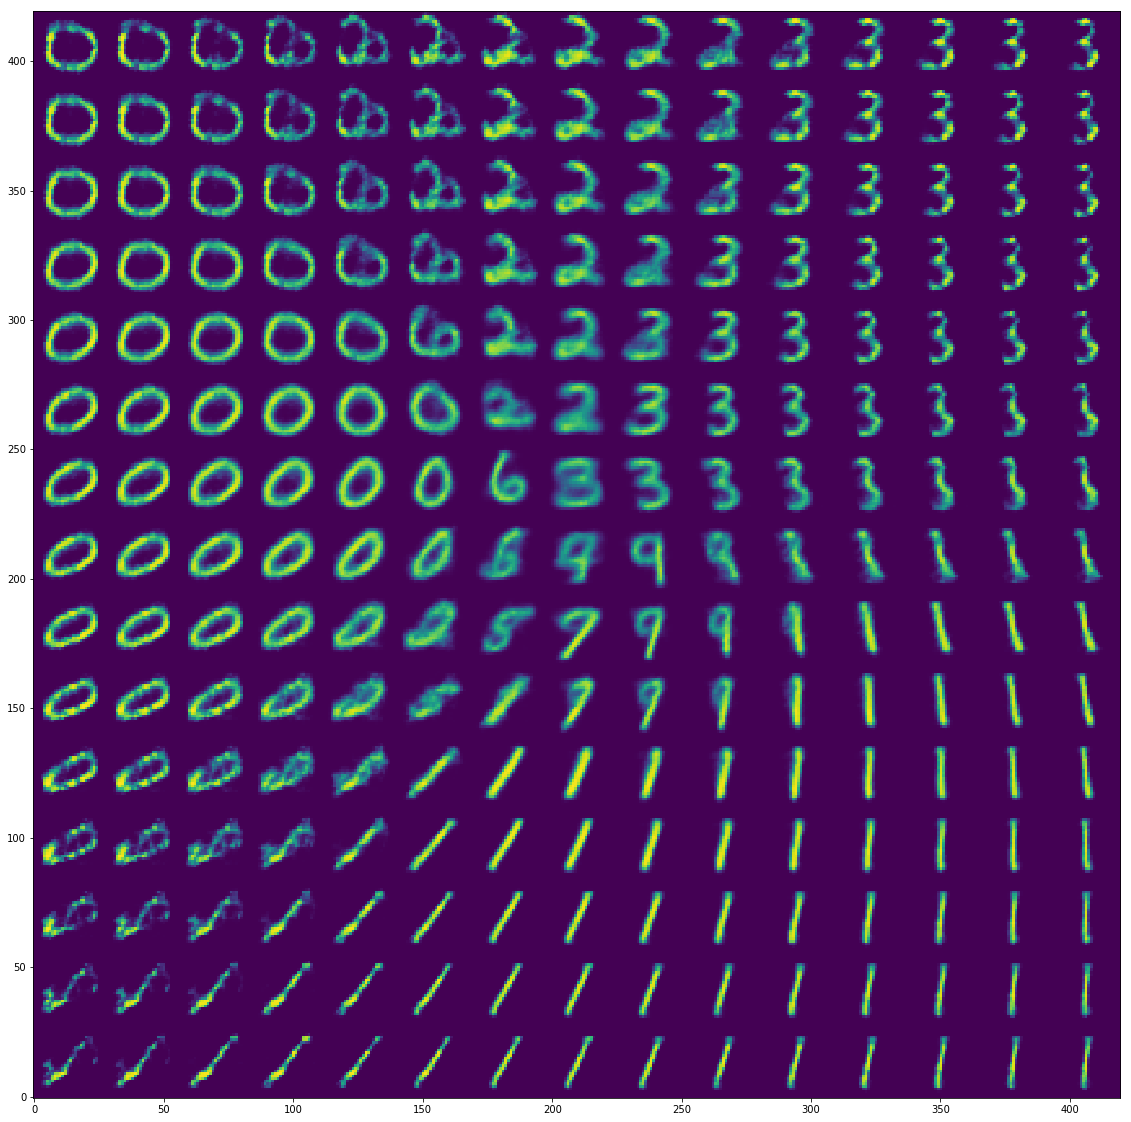

In [6]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Deeper for dense layers

In [9]:
layerDense = [128, 32, 8, 2]
layerConv=[8, 64]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 21s 354us/step - loss: 0.2133 - val_loss: 0.1920

Epoch 00001: val_loss improved from inf to 0.19196, saving model to ../model/temp/AutoEncoder.01-0.21-0.19.hdf5
Epoch 2/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.1883 - val_loss: 0.1862

Epoch 00002: val_loss improved from 0.19196 to 0.18618, saving model to ../model/temp/AutoEncoder.02-0.19-0.19.hdf5
Epoch 3/100
60000/60000 [==============================] - 20s 329us/step - loss: 0.1834 - val_loss: 0.1821

Epoch 00003: val_loss improved from 0.18618 to 0.18207, saving model to ../model/temp/AutoEncoder.03-0.18-0.18.hdf5
Epoch 4/100
60000/60000 [==============================] - 20s 330us/step - loss: 0.1805 - val_loss: 0.1790

Epoch 00004: val_loss improved from 0.18207 to 0.17905, saving model to ../model/temp/AutoEncoder.04-0.18-0.18.hdf5
Epoch 5/100
60000/60000 [=============================

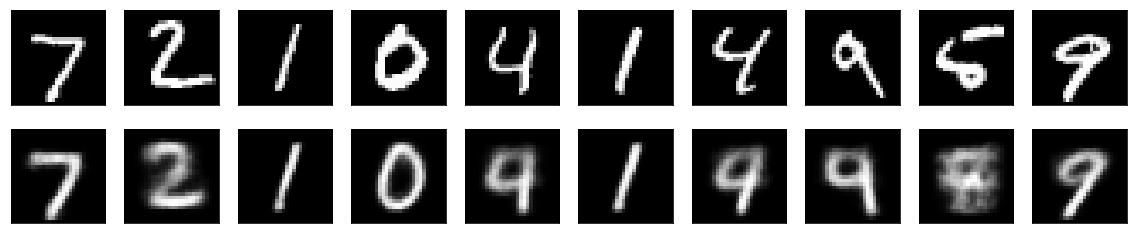

0.19335885


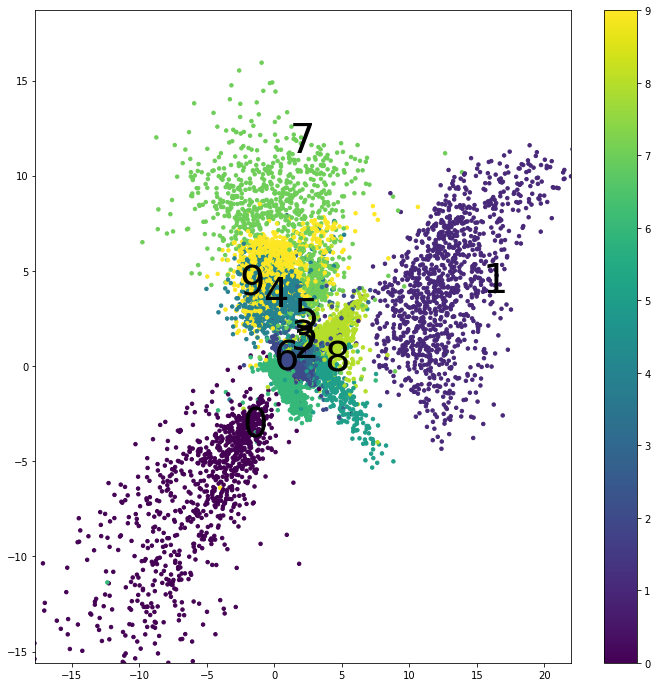

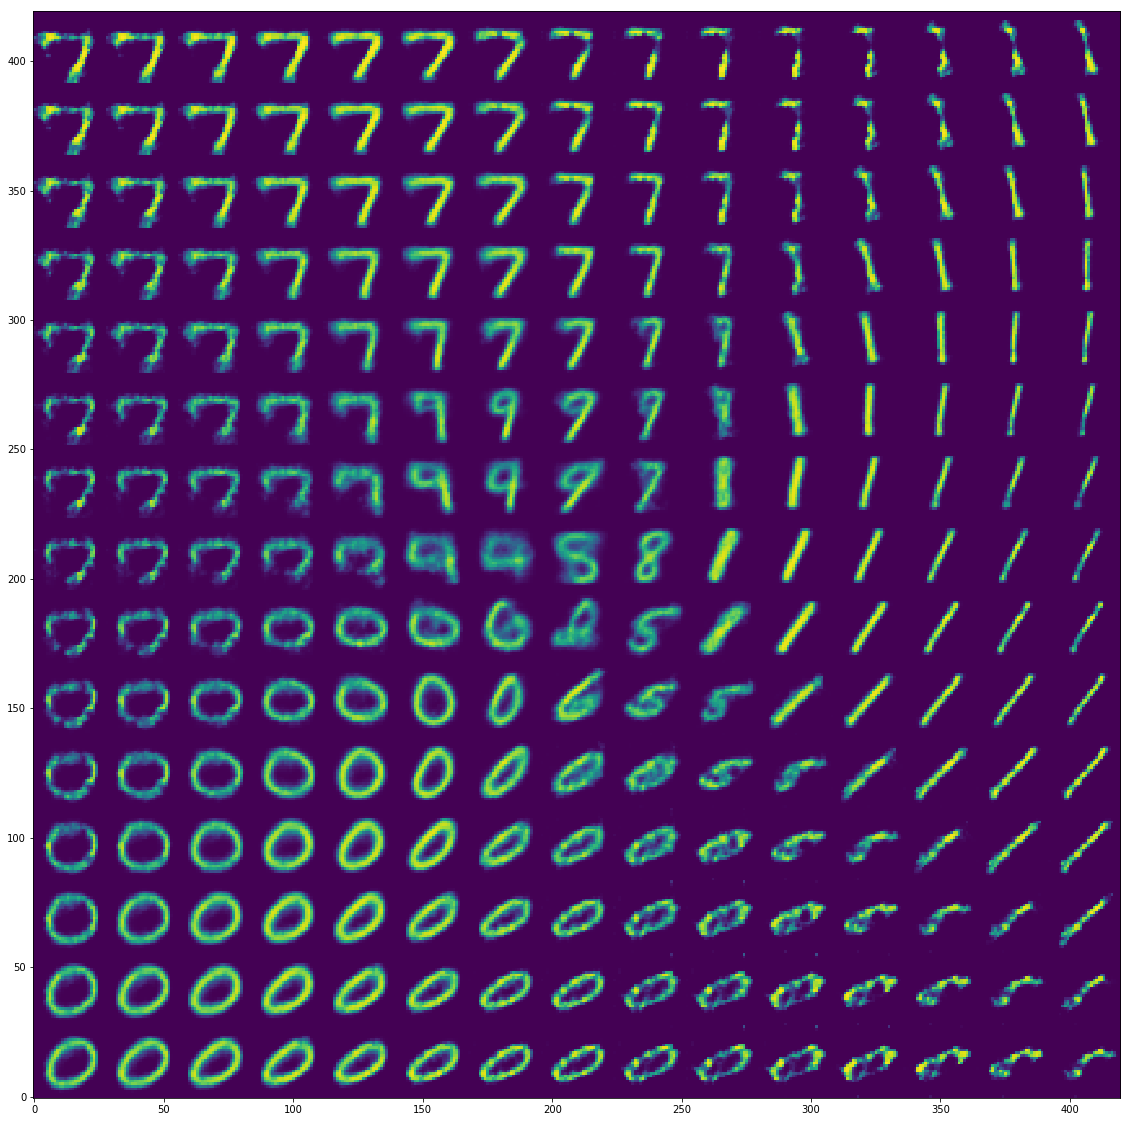

In [8]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

# Use different activation

In [10]:
layerDense = [128, 32, 8, 2]
layerConv=[8, 64]

convVAE = ConvVAE(dimInput, 
                  layerDense=layerDense, actDense='relu', 
                  layerConv=layerConv, 
                  ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 22s 366us/step - loss: 0.2263 - val_loss: 0.1979

Epoch 00001: val_loss improved from inf to 0.19786, saving model to ../model/temp/AutoEncoder.01-0.23-0.20.hdf5
Epoch 2/100
60000/60000 [==============================] - 20s 326us/step - loss: 0.1901 - val_loss: 0.1848

Epoch 00002: val_loss improved from 0.19786 to 0.18483, saving model to ../model/temp/AutoEncoder.02-0.19-0.18.hdf5
Epoch 3/100
60000/60000 [==============================] - 19s 323us/step - loss: 0.1833 - val_loss: 0.1822

Epoch 00003: val_loss improved from 0.18483 to 0.18223, saving model to ../model/temp/AutoEncoder.03-0.18-0.18.hdf5
Epoch 4/100
60000/60000 [==============================] - 21s 344us/step - loss: 0.1797 - val_loss: 0.1780

Epoch 00004: val_loss improved from 0.18223 to 0.17804, saving model to ../model/temp/AutoEncoder.04-0.18-0.18.hdf5
Epoch 5/100
60000/60000 [=============================

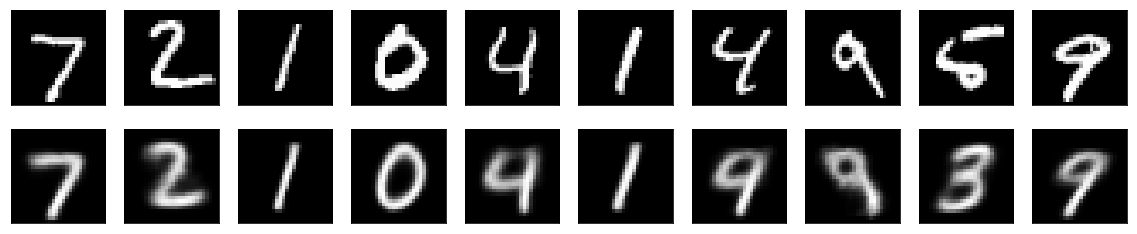

0.1900927


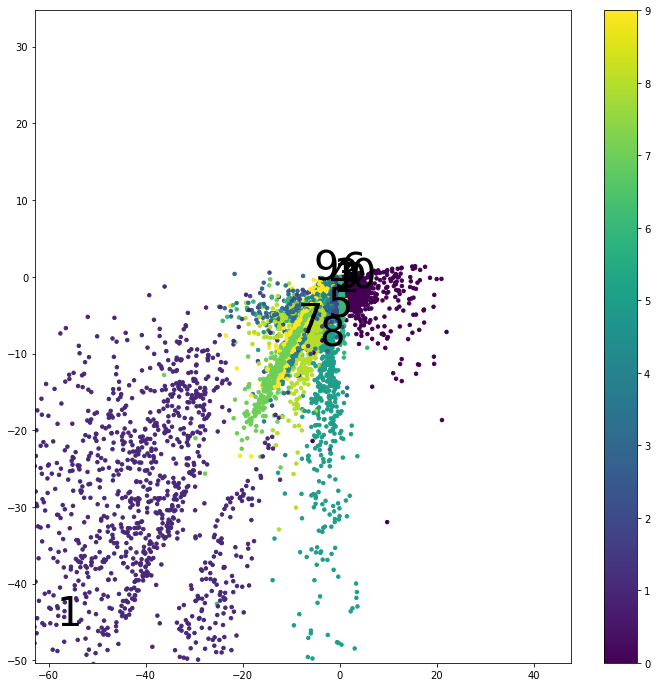

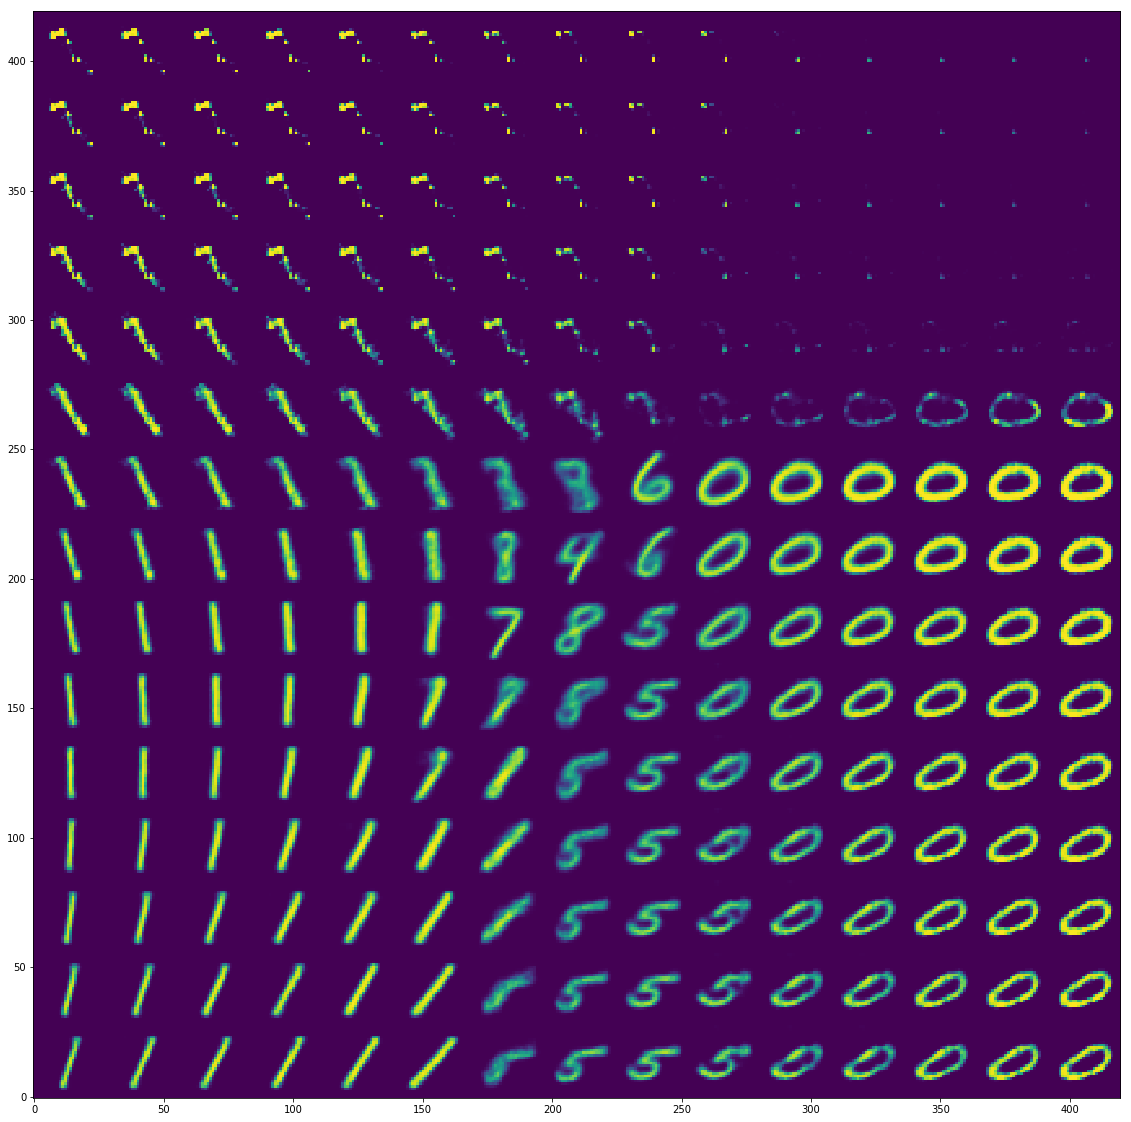

In [11]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

In [8]:
encoder.summary()
decoder.summary()
convVAE.autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 8)    80          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 7, 7, 64)     4672        conv2d_5[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 3136)         0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
dense_13 (

In [9]:
layerDense = [128, 32, 8, 2]
layerConv=[8, 64]

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 18s 305us/step - loss: 0.2187 - val_loss: 0.1929

Epoch 00001: val_loss improved from inf to 0.19287, saving model to ../model/temp/Conv_AutoEncoder.01-0.22-0.19.hdf5
Epoch 2/100
60000/60000 [==============================] - 17s 279us/step - loss: 0.1872 - val_loss: 0.1830

Epoch 00002: val_loss improved from 0.19287 to 0.18302, saving model to ../model/temp/Conv_AutoEncoder.02-0.19-0.18.hdf5
Epoch 3/100
60000/60000 [==============================] - 17s 276us/step - loss: 0.1805 - val_loss: 0.1785

Epoch 00003: val_loss improved from 0.18302 to 0.17848, saving model to ../model/temp/Conv_AutoEncoder.03-0.18-0.18.hdf5
Epoch 4/100
60000/60000 [==============================] - 17s 278us/step - loss: 0.1772 - val_loss: 0.1766

Epoch 00004: val_loss improved from 0.17848 to 0.17658, saving model to ../model/temp/Conv_AutoEncoder.04-0.18-0.18.hdf5
Epoch 5/100
60000/60000 [=========

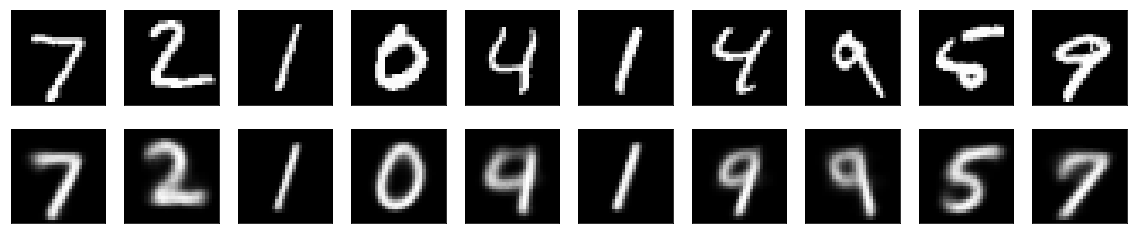

0.1894081


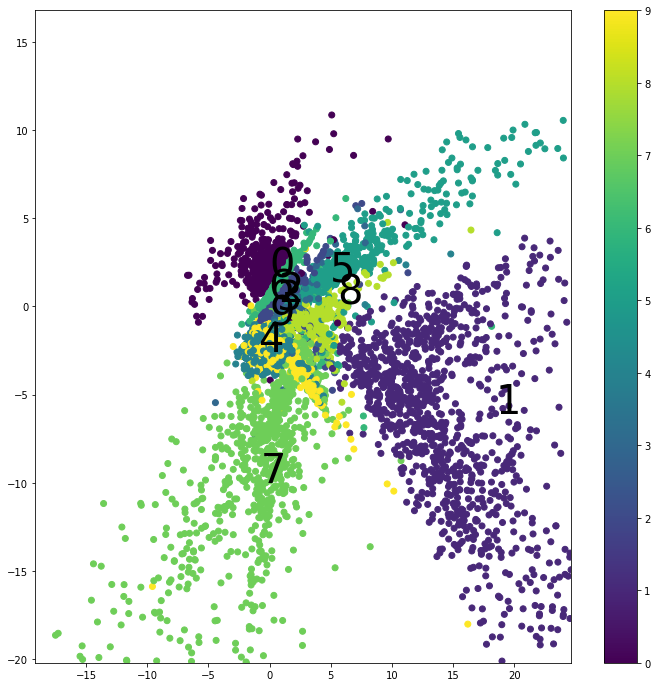

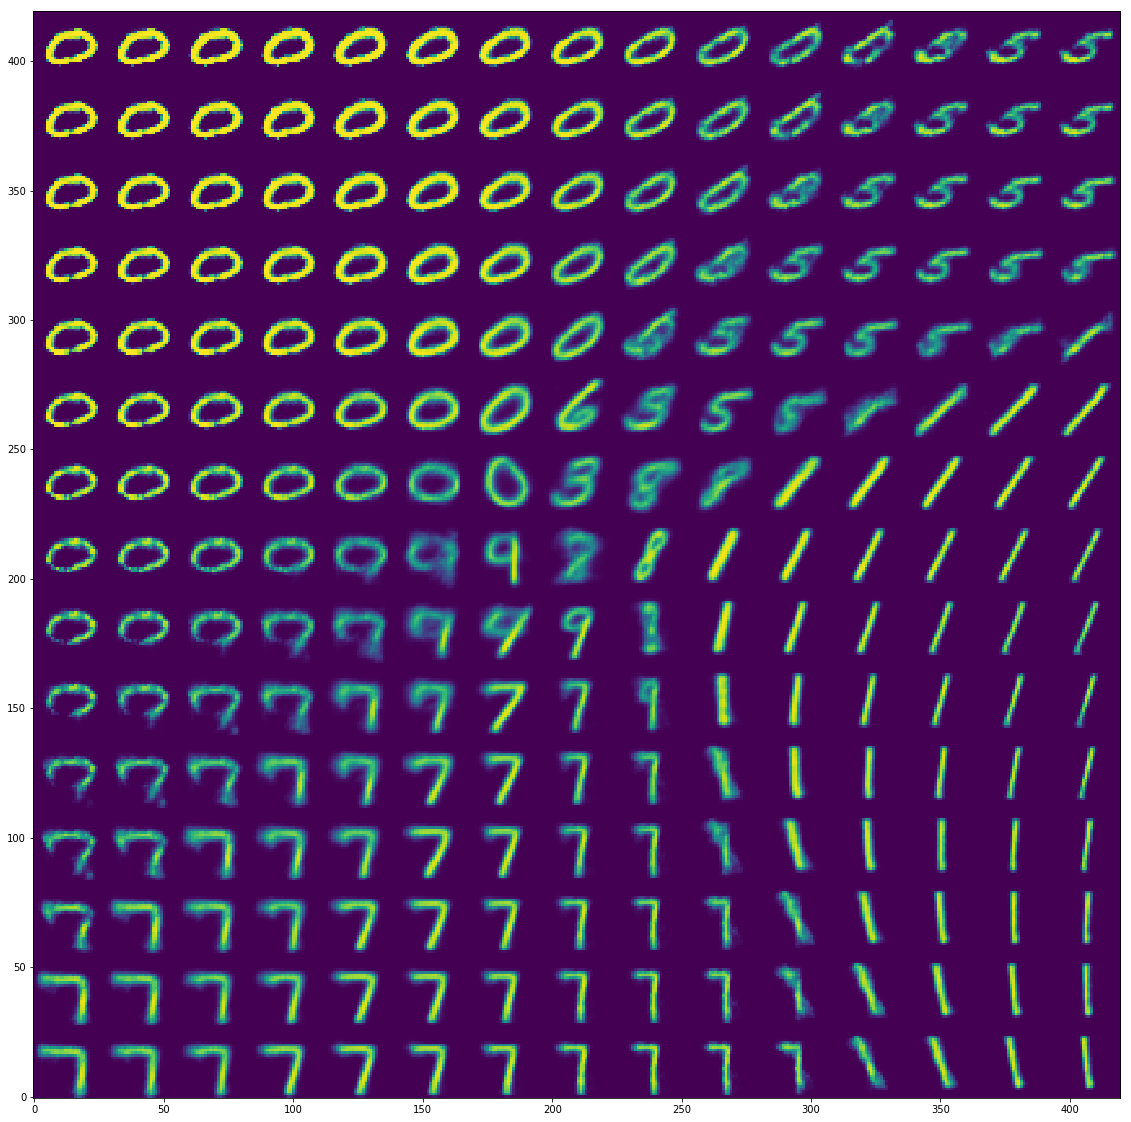

In [10]:
encoder = convVAE.encoder
decoder = convVAE.decoder

# Get encoded and decoded values
encodeTest = encoder.predict(xTest)
decodeTest = decoder.predict(encodeTest)
meanEncTest = np.mean(encodeTest, axis=0)
stdEncTest = np.std(encodeTest, axis=0)

# Plot the comparison of original and reconstructed pictures, and calculate the errors
plotCompDecode(xTest, decodeTest, sizeDigit=sizeDigit)
err = compReconst(xTest, decodeTest, method='rmse')
print(err)

# Plot the scatter of the encoding space
xlim = (meanEncTest[0] - 4*stdEncTest[0], meanEncTest[0] + 4*stdEncTest[0])
ylim = (meanEncTest[1] - 4*stdEncTest[1], meanEncTest[1] + 4*stdEncTest[1])
plotScatterEncode(encodeTest, yTest, xlim, ylim, numShow=10000)
scoreSilh = silhouette_score(encodeTest, yTest)    

# Plot the decoding results from the encoding scatter
plotScatterDecode(decoder, sizeDigit, xlim, ylim)

In [11]:
layerDense = [128, 32, 8, 2]
layerConv = [8, 64]
ratRecon = 0.999

convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv= layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 tempPathBest=modelPath)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 288us/step - loss: 0.2190 - val_loss: 0.1981

Epoch 00001: val_loss improved from inf to 0.19810, saving model to ../model/temp/Conv_AutoEncoder.01-0.22-0.20.hdf5
Epoch 2/100
60000/60000 [==============================] - 16s 271us/step - loss: 0.1942 - val_loss: 0.1918

Epoch 00002: val_loss improved from 0.19810 to 0.19179, saving model to ../model/temp/Conv_AutoEncoder.02-0.19-0.19.hdf5
Epoch 3/100
60000/60000 [==============================] - 16s 272us/step - loss: 0.1887 - val_loss: 0.1872

Epoch 00003: val_loss improved from 0.19179 to 0.18717, saving model to ../model/temp/Conv_AutoEncoder.03-0.19-0.19.hdf5
Epoch 4/100
60000/60000 [==============================] - 17s 275us/step - loss: 0.1860 - val_loss: 0.1860

Epoch 00004: val_loss improved from 0.18717 to 0.18598, saving model to ../model/temp/Conv_AutoEncoder.04-0.19-0.19.hdf5
Epoch 5/100
60000/60000 [=========